# Rare Variant Analysis Thresholding 

In [51]:
system("gsutil cp gs://fc-secure-0308c0e1-3e68-4e53-bc22-44f6546cb6fb/submissions/b7e3eb67-c8fb-4dc9-9a83-a59a68cbebee/Regenie/17a68af0-68bf-4ee5-920e-afd059291bb7/call-join_Output/glob-5c49c7ba2dd6ddc8ac2dc596f01f31d7/total_pass_mut.regenie .")
library(data.table)
rare_variants <-fread("total_pass_mut.regenie",skip=1, fill=T)
head(rare_variants)

CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,923928,SAMD11.Mask2.singleton,ref,Mask2.singleton,0.00532832,6381,ADD,-2.74994,6.37873,0.185856,0.176273,NA
1,923928,SAMD11.Mask2.0.01,ref,Mask2.0.01,0.0461526,6381,ADD,-2.6614,2.29844,1.34076,0.60748,NA
1,923928,SAMD11.Mask4.singleton,ref,Mask4.singleton,0.000391788,6381,ADD,-22.5548,23.5233,0.919353,0.47154,NA
1,923928,SAMD11.Mask4.0.01,ref,Mask4.0.01,0.00250744,6381,ADD,-0.409778,9.29325,0.0019443,0.0155495,NA
1,923928,SAMD11.Mask4.all,ref,Mask4.all,NA,6381,ADD-SKAT,NA,NA,0.797747,0.429728,NA
1,923928,SAMD11.Mask4.all,ref,Mask4.all,NA,6381,ADD-SKATO,NA,NA,0.46618,0.305614,NA


[1] 102182

CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
22,50738196,ACR.Mask2.all,ref,Mask2.all,0.0104999,6381,ADD,-5.01183,4.60286,1.1856,0.558746,NA
22,50767501,RABL2B.Mask2.singleton,ref,Mask2.singleton,0.00109701,6381,ADD,0.676504,14.0133,0.00233056,0.0170523,NA
22,50767501,RABL2B.Mask2.0.01,ref,Mask2.0.01,0.0117536,6381,ADD,-4.59524,4.37672,1.10235,0.53202,NA
22,50767501,RABL2B.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKAT,NA,NA,0.201174,0.184572,NA
22,50767501,RABL2B.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,0.602948,0.359066,NA
22,50767501,RABL2B.Mask2.all,ref,Mask2.all,0.0117536,6381,ADD,-4.59524,4.37672,1.10235,0.53202,NA


In [52]:
library(dplyr)
add<-rare_variants %>% filter(grepl('all',ID))
add <-subset.data.frame(add, TEST=="ADD")


[1] 21311

In [54]:
install.packages("qqman")
library(qqman)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



In [55]:
add$LOG10P <-as.numeric(add$LOG10P)
add$P <-10^-add$LOG10P
head(add)

CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,P
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,923928,SAMD11.Mask4.all,ref,Mask4.all,0.00250744,6381,ADD,-0.409778,9.29325,0.0019443,0.0155495,NA,0.96482934
1,944204,NOC2L.Mask2.all,ref,Mask2.all,0.0277386,6381,ADD,-3.81267,2.90354,1.72426,0.7232050,NA,0.18914506
1,960587,KLHL17.Mask2.all,ref,Mask2.all,0.0101865,6381,ADD,-2.95285,4.63381,0.406074,0.2806950,NA,0.52396828
1,966497,PLEKHN1.Mask2.all,ref,Mask2.all,0.0324401,6381,ADD,1.67235,2.69252,0.385776,0.2720290,NA,0.53452867
1,975204,PERM1.Mask2.all,ref,Mask2.all,0.0378467,6381,ADD,4.3437,2.51482,2.98335,1.0750700,NA,0.08412595
1,975204,PERM1.Mask4.all,ref,Mask4.all,0.000548503,6381,ADD,-5.82933,17.9776,0.105141,0.1274090,NA,0.74574612


[1] 0.933383

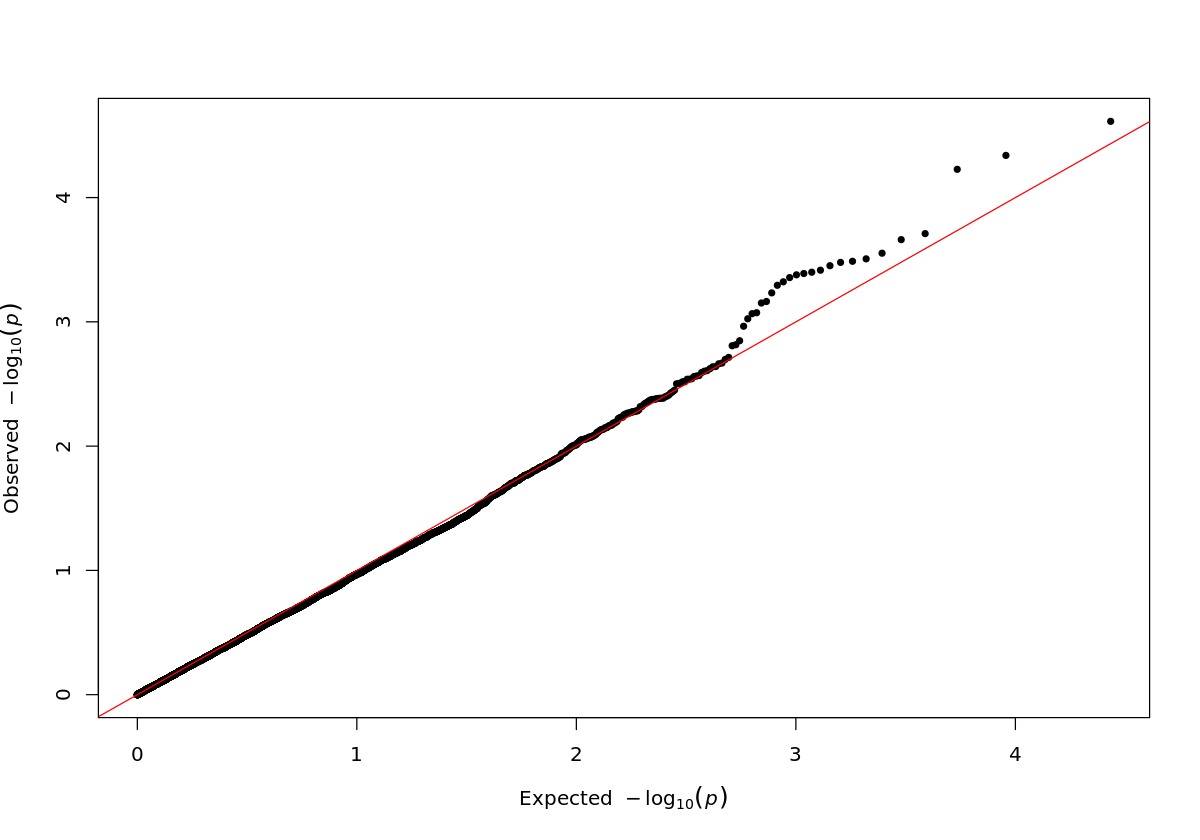

In [82]:
subset <-subset.data.frame(add, A1FREQ>=0.005)
qq(subset$P)
pvalue <-subset$P
chisq <- qchisq(1-pvalue,1)
lambda = median(chisq)/qchisq(0.5,1)
lambda

In [83]:
ids <-list(subset$ID)

In [84]:
rare_variants_subset <-rare_variants[rare_variants$ID %in% unlist(ids),]
rare_variants_subset <-subset.data.frame(rare_variants_subset, TEST=="ADD-SKATO")
rare_variants_subset$LOG10P <-as.numeric(rare_variants_subset$LOG10P)
rare_variants_subset$P <-10^-rare_variants_subset$LOG10P

CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,P
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,944204,NOC2L.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,0.755472,0.414822,NA,0.3847494
1,960587,KLHL17.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,2.24899,0.873863,NA,0.1337017
1,966497,PLEKHN1.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,0.0893567,0.116341,NA,0.7649957
1,975204,PERM1.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,2.04436,0.815958,NA,0.1527714
1,998962,HES4.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,1.10459,0.532747,NA,0.2932601
1,1001138,ISG15.Mask2.all,ref,Mask2.all,NA,6381,ADD-SKATO,NA,NA,0.377526,0.268467,NA,0.5389308


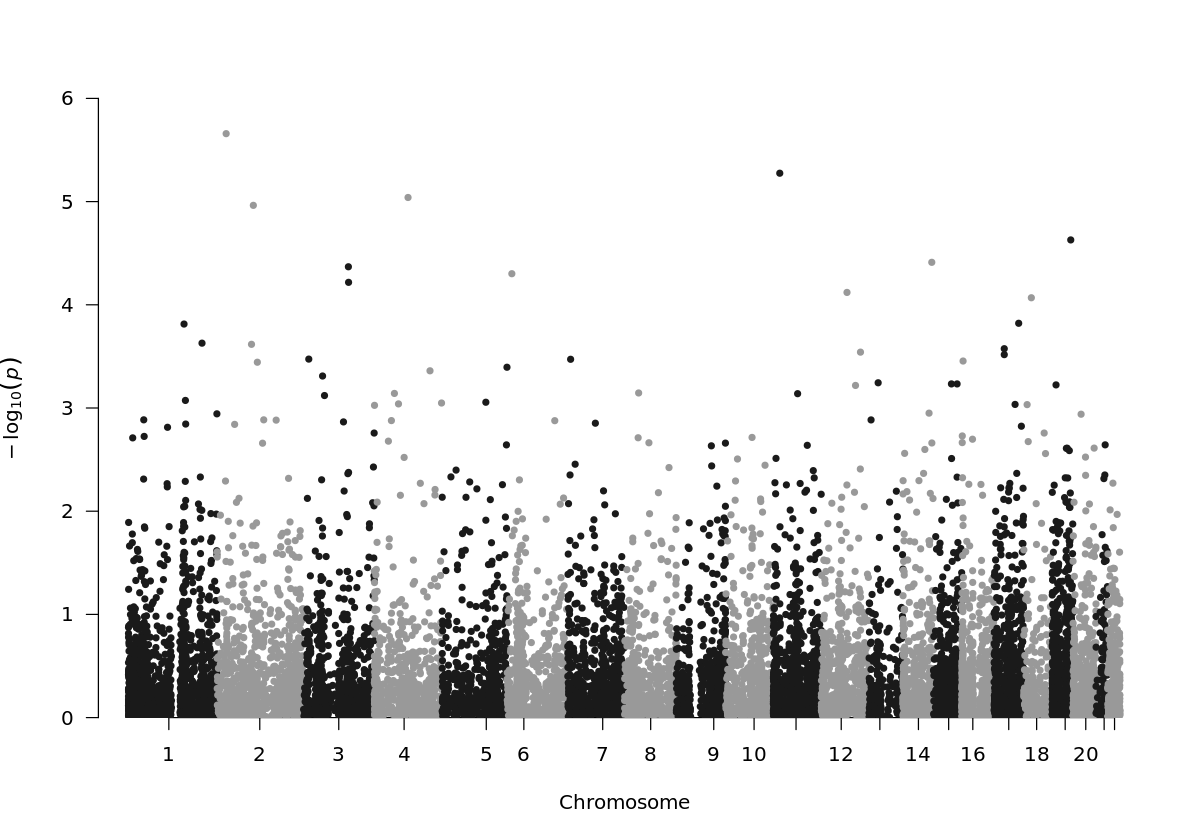

In [90]:
rare_variants_subset$CHROM <-as.numeric(rare_variants_subset$CHROM)
rare_variants_subset$GENPOS <-as.numeric(rare_variants_subset$GENPOS)
manhattan(rare_variants_subset, chr='CHROM', snp='ID', bp='GENPOS', p='P', suggestiveline=F)
